In [1]:
import sys, os, astropy
#sys.path.append('../../luseepy')
#print(sys.path)
#kernel_name = os.path.basename(sys.executable.replace("/bin/python",""))
#print(kernel_name)
import lusee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from    lusee.LunarCalendar  import LunarCalendar
import  astropy.units   as u
from    astropy.time import Time

In [2]:
night = 2600
import  astropy.units   as u
obs = lusee.Observation(night, deltaT_sec=3600)

/usr/local/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 31 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0.5, 1.0, 'Celestial Positions in LuSEE First Night 2026')

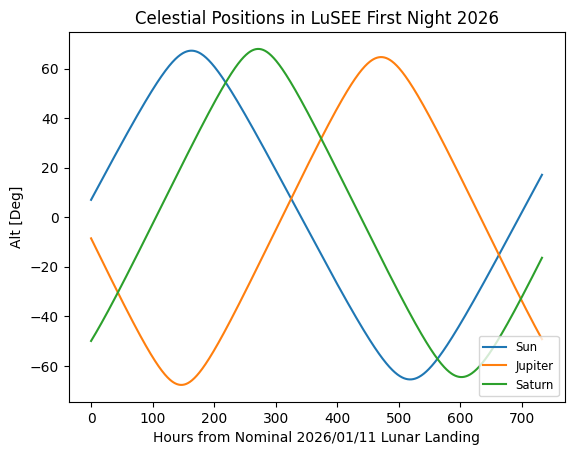

In [3]:
#Plot sun, jupiter, and saturn altitude on LuSEE's first day on the moon
deltaT=3600 #In seconds
obs = lusee.Observation('2026-01-11 12:00:00 to 2026-02-11 00:00:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')
plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Alt [Deg]")
plt.title("Celestial Positions in LuSEE First Night 2026")

In [4]:
#Calculate remaining daylight on first day from nominal landing of Jan 11th 2026

sunset_index = np.where(alt<0)[0][0]-1
day_length = (obs.times[sunset_index]-obs.times[0])
print("Length of first day: ", (day_length)*24, "hours")



Length of first day:  340.9999999999997 hours


Text(0.5, 1.0, 'Celestial Positions in LuSEE First Night 2026')

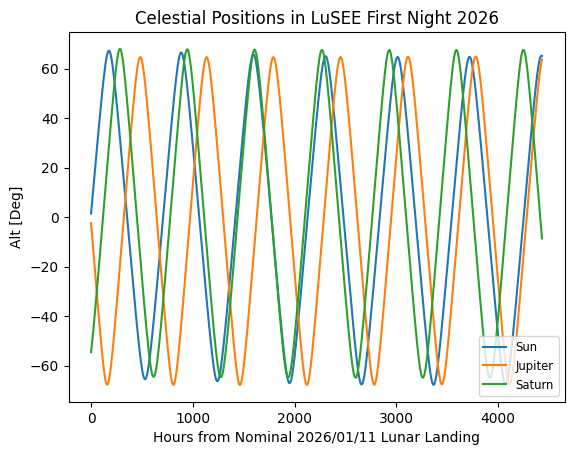

In [5]:
#Plot celestial object altitudes for first 6 lunar nights

deltaT=3600 #In seconds
obs = lusee.Observation('2026-01-11 00:00:00 to 2026-07-14 14:34:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')
plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Alt [Deg]")
plt.title("Celestial Positions in LuSEE First Night 2026")

In [6]:
delta_t_sec=3600
obs = lusee.Observation('2026-01-11 12:00:00 to 2026-07-30 00:00:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
altj, azj = obs.get_track_solar('jupiter')
alts, azs = obs.get_track_solar('saturn')
altg, zag = obs.get_track_l_b(0.,0.) # Galactic center

In [7]:
def start_stop_indices(arr):
    sunset,sunrise = [],[]
    # get sunset and sunrise indices
    for i in range(len(alt)-1):
        if (not arr[i]) and arr[i+1]:
            sunset.append(i)
        elif arr[i] and (not arr[i+1]):
            sunrise.append(i)
    return sunset,sunrise

sunset,sunrise = start_stop_indices(alt<0) #sunrise, sunset
pls, ple = start_stop_indices((altj>20/180*np.pi) | (alts>20/180*np.pi)) #planets
gs,ge = start_stop_indices(altg>20/180*np.pi) #galactic center
if ge[0]<gs[0]:
    ge = ge[1:]

(0.0, 80.0)

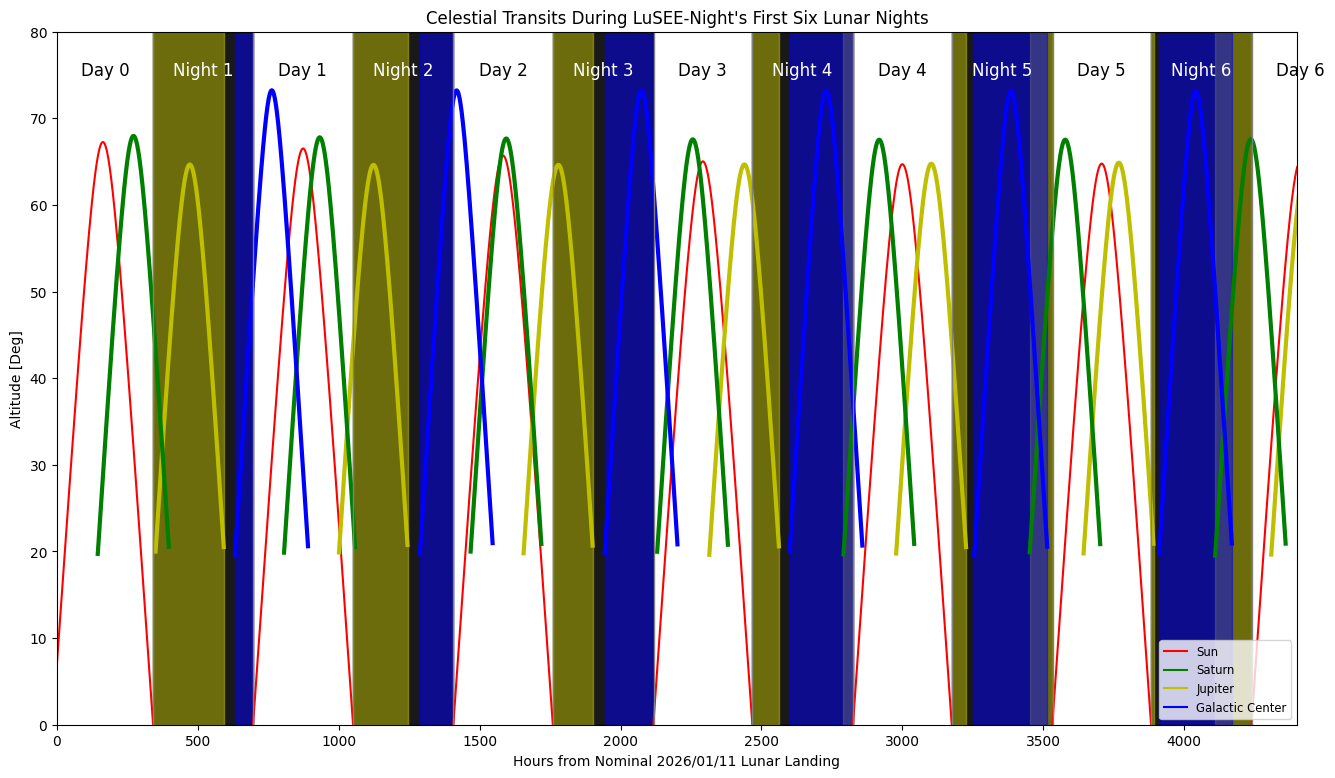

In [8]:
fig, ax = plt.subplots(figsize=(16,9))

plt.plot(alt*180/np.pi, 'r-', label='Sun')
#plt.plot(altj*180/np.pi, 'c-',label='Jupiter')
for s,e in zip(*start_stop_indices(altj>20/180*np.pi)):
    plt.plot(np.arange(s,e),altj[s:e]*180/np.pi, 'y-',lw=3)
#plt.plot(alts*180/np.pi, 'g-',label='Saturn')
for s,e in zip(*start_stop_indices(alts>20/180*np.pi)):
    plt.plot(np.arange(s,e),alts[s:e]*180/np.pi, 'g-',lw=3)

for s,e in zip(gs,ge):
    plt.plot(np.arange(s,e),altg[s:e]*180/np.pi, 'b-',lw=3)

plt.plot([],[],'g-',label='Saturn')
plt.plot([],[],'y-',label='Jupiter')
plt.plot([],[],'b-',label='Galactic Center')


shade_alpha = 0.9
shade_alpha_sec = 0.5
for dn,(ss,sr) in enumerate(zip([0]+sunrise,sunset)):
    

    ax.text(0.5*(ss+sr), 75, f'Day {dn}', fontsize=12, color='k', horizontalalignment='center')

for dn,(ss,sr) in enumerate(zip(sunset,sunrise)):
    ax.axline((ss,0), (ss,90), color='gray', linestyle='-',lw=1)
    ax.axline((sr+1,0), (sr+1,90), color='gray', linestyle='-',lw=1)

    ax.axvspan(ss, sr, alpha=shade_alpha, color='k')
    ax.text(0.5*(ss+sr), 75, f'Night {dn+1}', fontsize=12, color='w', horizontalalignment='center')

    for s,e in zip (pls,ple):
        if ((s>ss) and (s<sr)) or ((e>ss) and (e<sr)):
            ax.axvspan(max(s,ss), min(e,sr), alpha=shade_alpha_sec, color='y')
    for s,e in zip (gs,ge):
        if ((s>ss) and (s<sr)) or ((e>ss) and (e<sr)):
            ax.axvspan(max(s,ss), min(e,sr), alpha=shade_alpha_sec, color='b')
            

plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Altitude [Deg]")
plt.title("Celestial Transits During LuSEE-Night's First Six Lunar Nights")
plt.xlim(0,4400)
plt.ylim(0,80)